Découverte des données

In [1]:
# importation des packages
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lecture de la base de données provenant du chemin dans lequel se trouve la BD ou les fichiers de la BD
files=[file for file in os.listdir(r'C:\Users\Darko\Documents\DATA SCIENTIST\Data sales\BD')]
for file in files:
    print(file)

New_Data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
#Regrouper les fichiers csv et creer une seule base de données qui sera utilisée par la suite 
path=r'C:\Users\Darko\Documents\DATA SCIENTIST\Data sales\BD'
#Creer une nouvelle BD issue des fichiers de la premiere BD
all_data=pd.DataFrame()
for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_data])
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [4]:
#afin de voir la base de données de janvier uniquement on fait:
donnee_janvier=pd.read_csv(path+'/Sales_January_2019.csv')
donnee_janvier.shape

(9723, 6)

In [5]:
#Creer une seule nouvelle Base de Données csv appelée New Data
all_data.to_csv(path+'/New_Data.csv',index=False)

In [6]:
#Determinier la nature des données presentes dans la Nouvelle base de donnée
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
# voir les premieres valeurs de la base de données
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
#voir les valeurs manquantes dans la BD
all_data.isnull().sum()

Order ID            2725
Product             2725
Quantity Ordered    2725
Price Each          2725
Order Date          2725
Purchase Address    2725
dtype: int64

In [9]:
#comment supprimer les valeurs manquantes (technique de nettoyage de la BD)
all_data=all_data.dropna(how='all')

In [10]:
#visualiser le nombre de lignes et de colonnes de la BD
all_data.shape

(931525, 6)

#QUEL EST LE MOIS DANS LEQUEL L'ENTREPRISE A REALISEE LE PLUS GRAND CHIFFRE D'AFFAIRE?


In [11]:
def month(x):
    return x.split('/')[0]
month('04/07/19 22:30')

'04'

#creer une nouvelle colonne mois classée de maniere ordonnée

In [12]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [13]:
#verifier les valeurs numeriques des mois 
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [14]:
#supprimons la valeur "Order Date" qui n'est pas de type int
all_data=all_data[all_data['Month']!='Order Date']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [16]:
#changer les valeurs du type de données
all_data['Month']=all_data['Month'].astype(int)


<ipython-input-16-87720d25830b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype(int)


In [17]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

<ipython-input-17-617e7dc26f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


In [18]:
all_data['Price Each']=all_data['Price Each'].astype(float)

<ipython-input-18-007037e59fbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)


In [19]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [20]:
all_data['Product']=all_data['Product'].astype(str)

<ipython-input-20-5d75d45f2a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Product']=all_data['Product'].astype(str)


In [21]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [22]:
#SUPPRESSION DES DOUBLONS

all_data.drop_duplicates(inplace=True)

<ipython-input-22-dec4e393eee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.drop_duplicates(inplace=True)


In [23]:
all_data.shape

(185686, 7)

In [24]:
#PASSONS A L'OPERATION

In [25]:
#ventes realisées par jour

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

<ipython-input-25-50847553edcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']


In [26]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [27]:
#Somme des ventes effectuées et groupées par mois

all_data.groupby('Month')['Sales'].sum()

Month
1     1.821413e+06
2     2.200078e+06
3     2.804973e+06
4     3.389218e+06
5     3.150616e+06
6     2.576280e+06
7     2.646461e+06
8     2.241083e+06
9     2.094466e+06
10    3.734778e+06
11    3.197875e+06
12    4.608296e+06
Name: Sales, dtype: float64

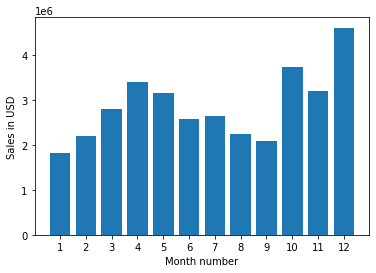

In [28]:
#PRESENTATION VISUELLE DE NOTRE RESULTAT

months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()


#QUELLE EST LA VILLE QUI A REALISEE LE MEILLEUR CHIFFRE D'AFFAIRE?

In [29]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [30]:
#comment choisir une information en applicant le .split('...') suivis de la valeur de l'element voulu [0,1,2,3,...]

'682 Chestnut St, Boston, MA 02215'.split(',')[1]

' Boston'

In [31]:
#creation d'une nouvelle colonne city à base de la colonne Purchase Adress qui contenait deja les infos sur les villes

def city(x):
    return x.split(',')[1]

In [32]:
all_data['city']=all_data['Purchase Address'].apply(city)

<ipython-input-32-df916a7bfb6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['city']=all_data['Purchase Address'].apply(city)


In [33]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [34]:
#regrouper et compter les differentes commandes effectuées par ville

all_data.groupby('city')['city'].count()

city
 Atlanta          14863
 Austin            9890
 Boston           19901
 Dallas           14797
 Los Angeles      29564
 New York City    24847
 Portland         12449
 San Francisco    44662
 Seattle          14713
Name: city, dtype: int64

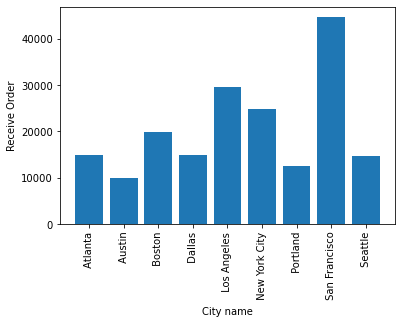

In [35]:
#creer un visuel afin de mieux voir la ville qui realise le plus de commande

plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Receive Order')
plt.xlabel('City name')
plt.show()


# A quel moment doit on creer une campagne publicitaire?

In [36]:
#Fonction d'extraction de l'heure qui est une donnée temporaire

all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

<ipython-input-36-bc86ab015ed8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [37]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [38]:
#creer deux variables
keys=[]
hours=[]
#regroupons donc par heure les commandes
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
hours

[3902,
 2347,
 1242,
 830,
 852,
 1320,
 2481,
 4002,
 6252,
 8740,
 10929,
 12392,
 12573,
 12115,
 10965,
 10159,
 10359,
 10884,
 12263,
 12886,
 12218,
 10905,
 8808,
 6262]

Text(0, 0.5, 'Nombre de commande')

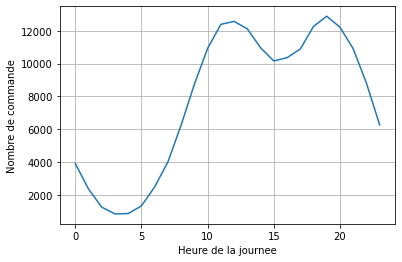

In [39]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('Heure de la journee')
plt.ylabel('Nombre de commande')

#D'apres le graphe ci dessous on peut constater que l'heure à laquelle nous pouvons lancer la plubicité se situe entre 12h et 19h
#car cest dans cet intervalle que le nombre de commande explose

#Comment determiner le produit qui realise le plus de ventes

<AxesSubplot:xlabel='Product'>

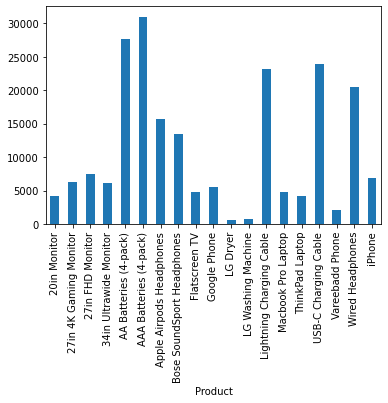

In [40]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

#influence du prix sur les produits commandés, on va utiliser la moyenne parceque les prix varient en fonction des offres

<AxesSubplot:xlabel='Product'>

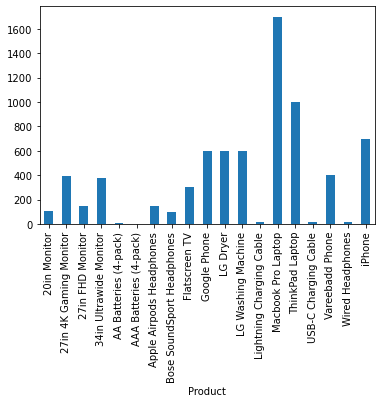

In [64]:
all_data.groupby('Product')['Price Each'].mean().plot(kind='bar')

In [43]:
#Prix moyen des produits

all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#lignes de codes nous permettant d'associé le tableau des ventes à celui des quantités commandées

In [42]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<ipython-input-69-a13d81eeecbc>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


Text(0.5, 0, 'Products name')

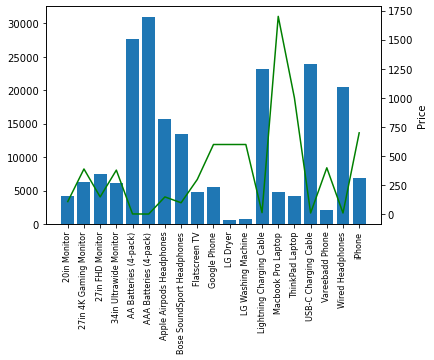

In [69]:
plt.Figure(figsize=(45,28))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity)
ax2.plot(products,prices,'g-')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.ylabel('Price')
plt.xlabel('Products name')

#Quel est la combinaison des produits les plus vendues 

In [49]:
#dupliquer la base de données Order ID

all_data[all_data['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13


In [50]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [51]:
#regrouper tous les produits achetés avec le meme identifiant des commandes passées

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-51-8f36d5841d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [53]:
df['Grouped']

3                        Google Phone,Wired Headphones
4                        Google Phone,Wired Headphones
18                   Google Phone,USB-C Charging Cable
19                   Google Phone,USB-C Charging Cable
32                 AAA Batteries (4-pack),Google Phone
                              ...                     
186792    34in Ultrawide Monitor,AA Batteries (4-pack)
186803         Wired Headphones,AAA Batteries (4-pack)
186804         Wired Headphones,AAA Batteries (4-pack)
186841               Google Phone,USB-C Charging Cable
186842               Google Phone,USB-C Charging Cable
Name: Grouped, Length: 14128, dtype: object

In [54]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [55]:
#suppression des commandes ID dupliquées

df2=df.drop_duplicates(subset=['Order ID'])

In [56]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,10,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...,...
186761,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,13,"iPhone,Wired Headphones"
186783,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,18,"iPhone,Lightning Charging Cable"
186791,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


In [59]:
#Quelles sont les combinaisons qui sont très achetées?

df2['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                          886
Google Phone,USB-C Charging Cable                                        857
iPhone,Wired Headphones                                                  361
Vareebadd Phone,USB-C Charging Cable                                     312
Google Phone,Wired Headphones                                            303
                                                                        ... 
Google Phone,USB-C Charging Cable,Wired Headphones,iPhone                  1
Google Phone,USB-C Charging Cable,Vareebadd Phone                          1
iPhone,Lightning Charging Cable,Wired Headphones,USB-C Charging Cable      1
27in FHD Monitor,LG Washing Machine                                        1
Vareebadd Phone,iPhone                                                     1
Name: Grouped, Length: 350, dtype: int64

In [61]:
#Pour voir les 10 premieres combinaisons des produits les plus achetés 

df2['Grouped'].value_counts()[0:10]

iPhone,Lightning Charging Cable                       886
Google Phone,USB-C Charging Cable                     857
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     79
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Grouped, dtype: int64

<AxesSubplot:ylabel='Grouped'>

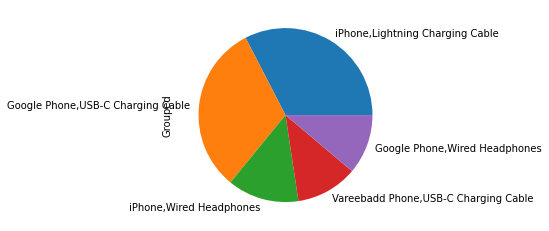

In [62]:
#afficher ce resultat sur un visuel

df2['Grouped'].value_counts()[0:5].plot.pie()